In [2]:
!nvidia-smi

Wed Oct 22 05:55:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.3 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [6]:
import os

ROOT_DIR = '/content/drive/MyDrive/vegetation segmentation.v2i.yolov8'
DATA_YAML = os.path.join(ROOT_DIR, 'data.yaml')

In [7]:
from ultralytics import YOLO

# Load YOLOv8 model (medium version)
model = YOLO("yolov8m.pt")  # or yolov8s/n for smaller/faster

# Train the model
model.train(
    data=DATA_YAML,        # dataset yaml
    epochs=50,             # number of training epochs
    imgsz=640,             # input image size
    batch=16,              # batch size (adjust for GPU)
    name="yolo_detection"  # folder name in /content/runs/train
)


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78be659abc80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
!ls '/content/runs/detect/yolo_detection'

args.yaml			 labels.jpg	      train_batch1.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1720.jpg  val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch1721.jpg  val_batch1_pred.jpg
confusion_matrix.png		 train_batch1722.jpg  weights


In [9]:
!ls '/content/runs/detect/yolo_detection/weights'

best.pt  last.pt


In [10]:
!yolo task=detect mode=val \
  model="/content/runs/detect/yolo_detection/weights/best.pt" \
  data="/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml"


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 71.7±11.7 MB/s, size: 182.3 KB)
val: Scanning /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/valid/labels.cache... 59 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.6it/s 2.5s
                   all         59        132       0.67      0.583      0.665      0.437
Speed: 7.4ms preprocess, 22.8ms inference, 0.1ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!yolo task=detect mode=predict \
  model="/content/runs/detect/yolo_detection/weights/best.pt" \
  conf=0.25 \
  source="/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images"


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/27 /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images/0-1-14_png.rf.571ebae03cd52ceac7ac1beee7c4e52e.jpg: 640x640 3 vegetations, 37.0ms
image 2/27 /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images/0-1-4_png.rf.52706a8121e702d22fe4b744ad603a5e.jpg: 640x640 1 vegetation, 36.9ms
image 3/27 /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images/0-13-15_png.rf.a87017e74e06c80c5cb466c08da01027.jpg: 640x640 7 vegetations, 37.0ms
image 4/27 /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images/0-13-37_png.rf.24fecf374abb8e9bf3c69fcd642b4814.jpg: 640x640 1 vegetation, 37.0ms
image 5/27 /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images/0-2-1_png.rf.1ae60430c36a46864d04f6d5ca407662.jpg: 640x640 (no detections), 37.1ms
image 6/27 /content

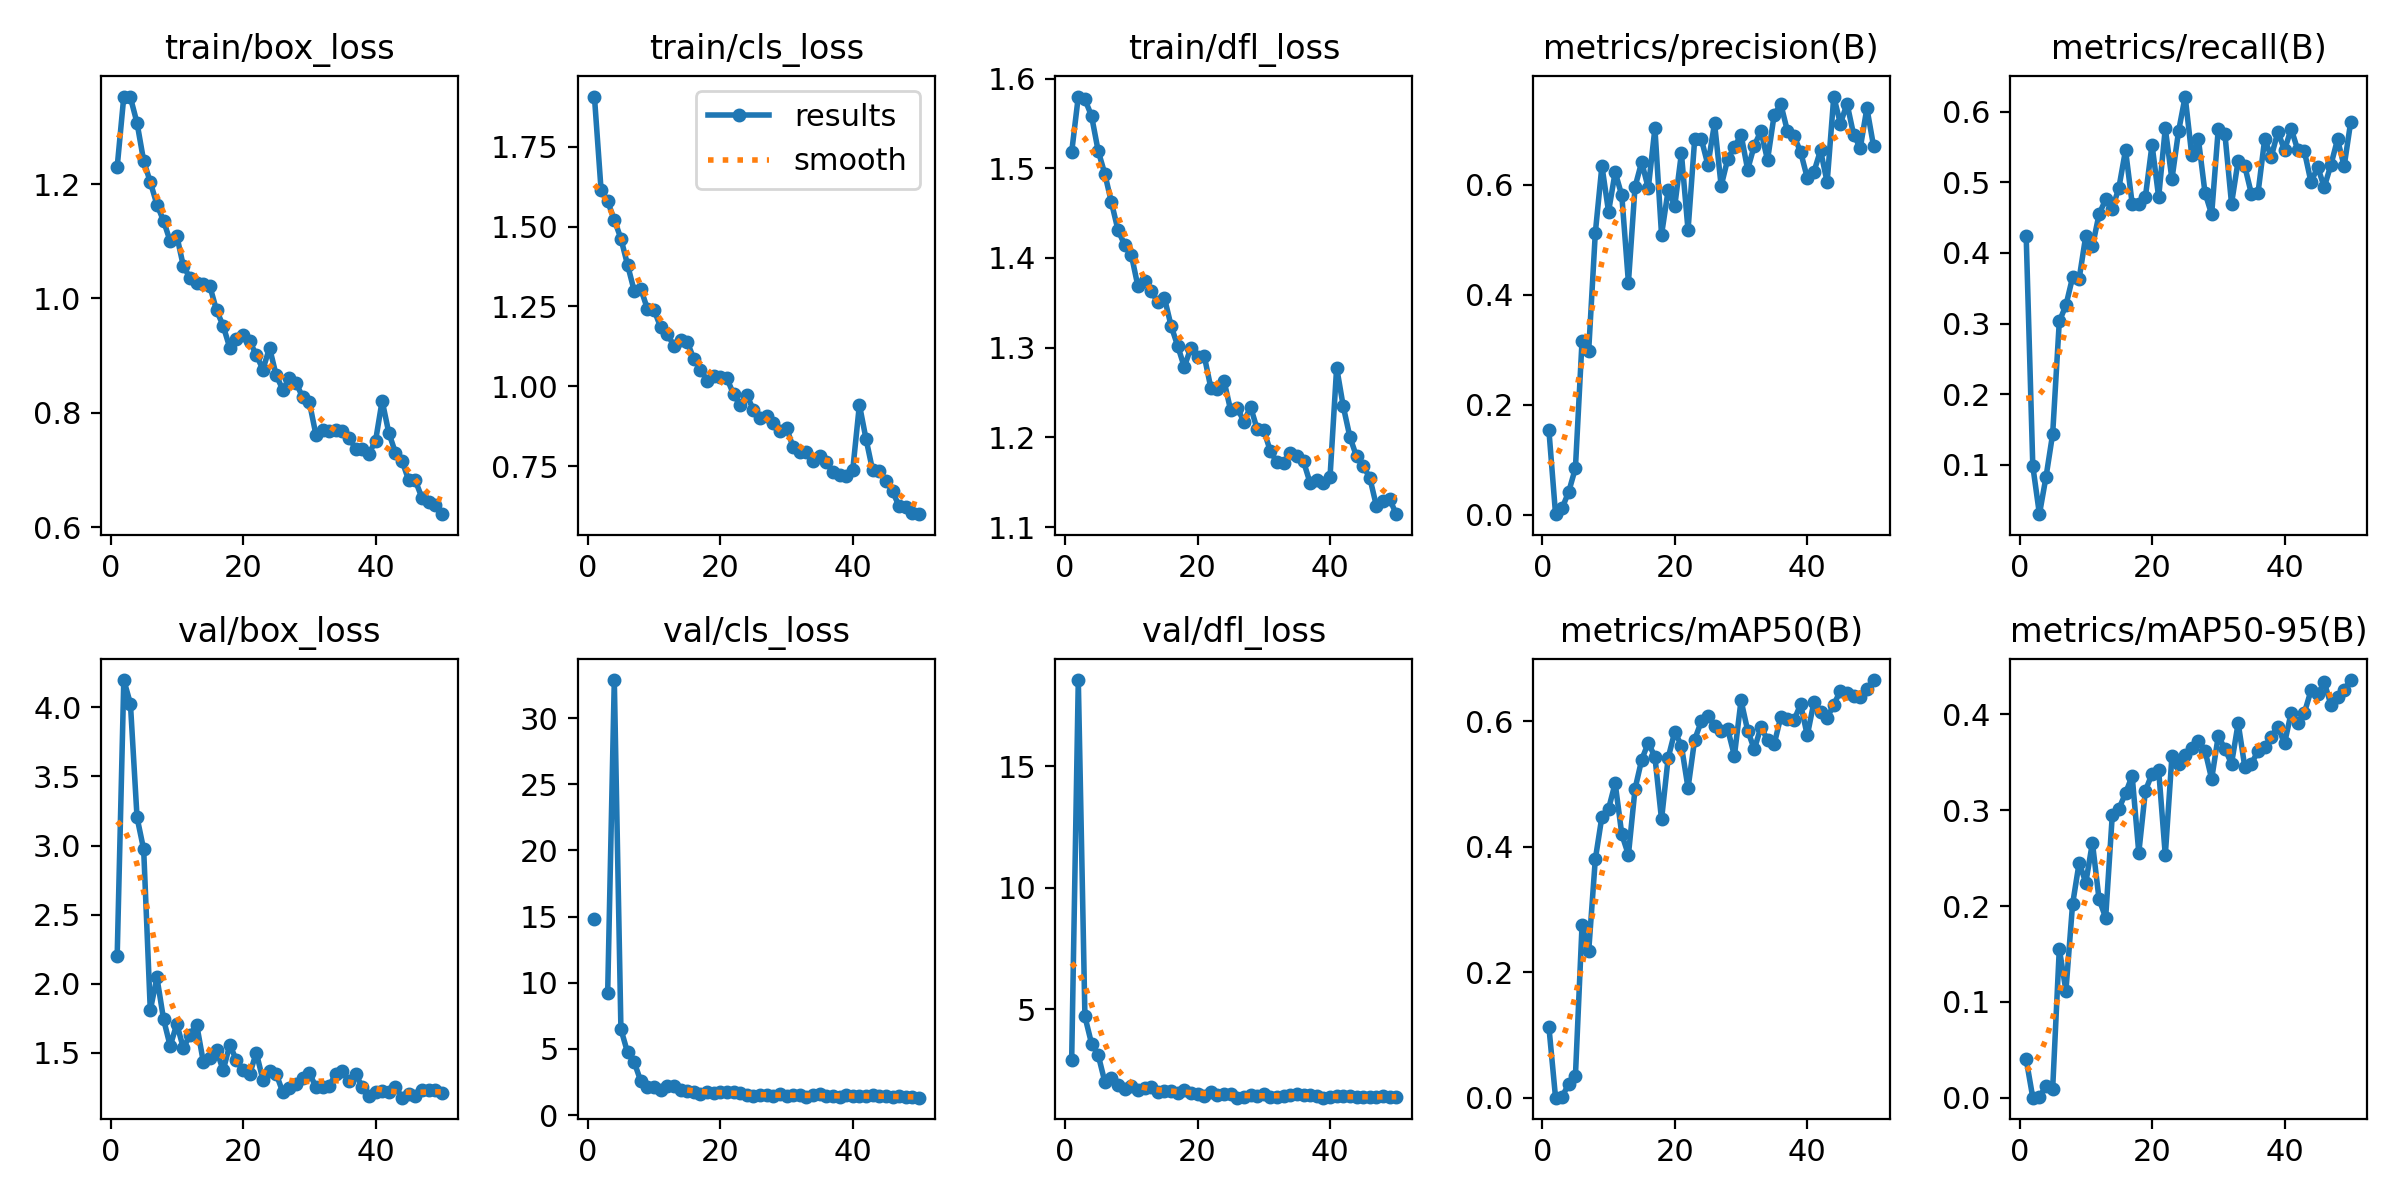

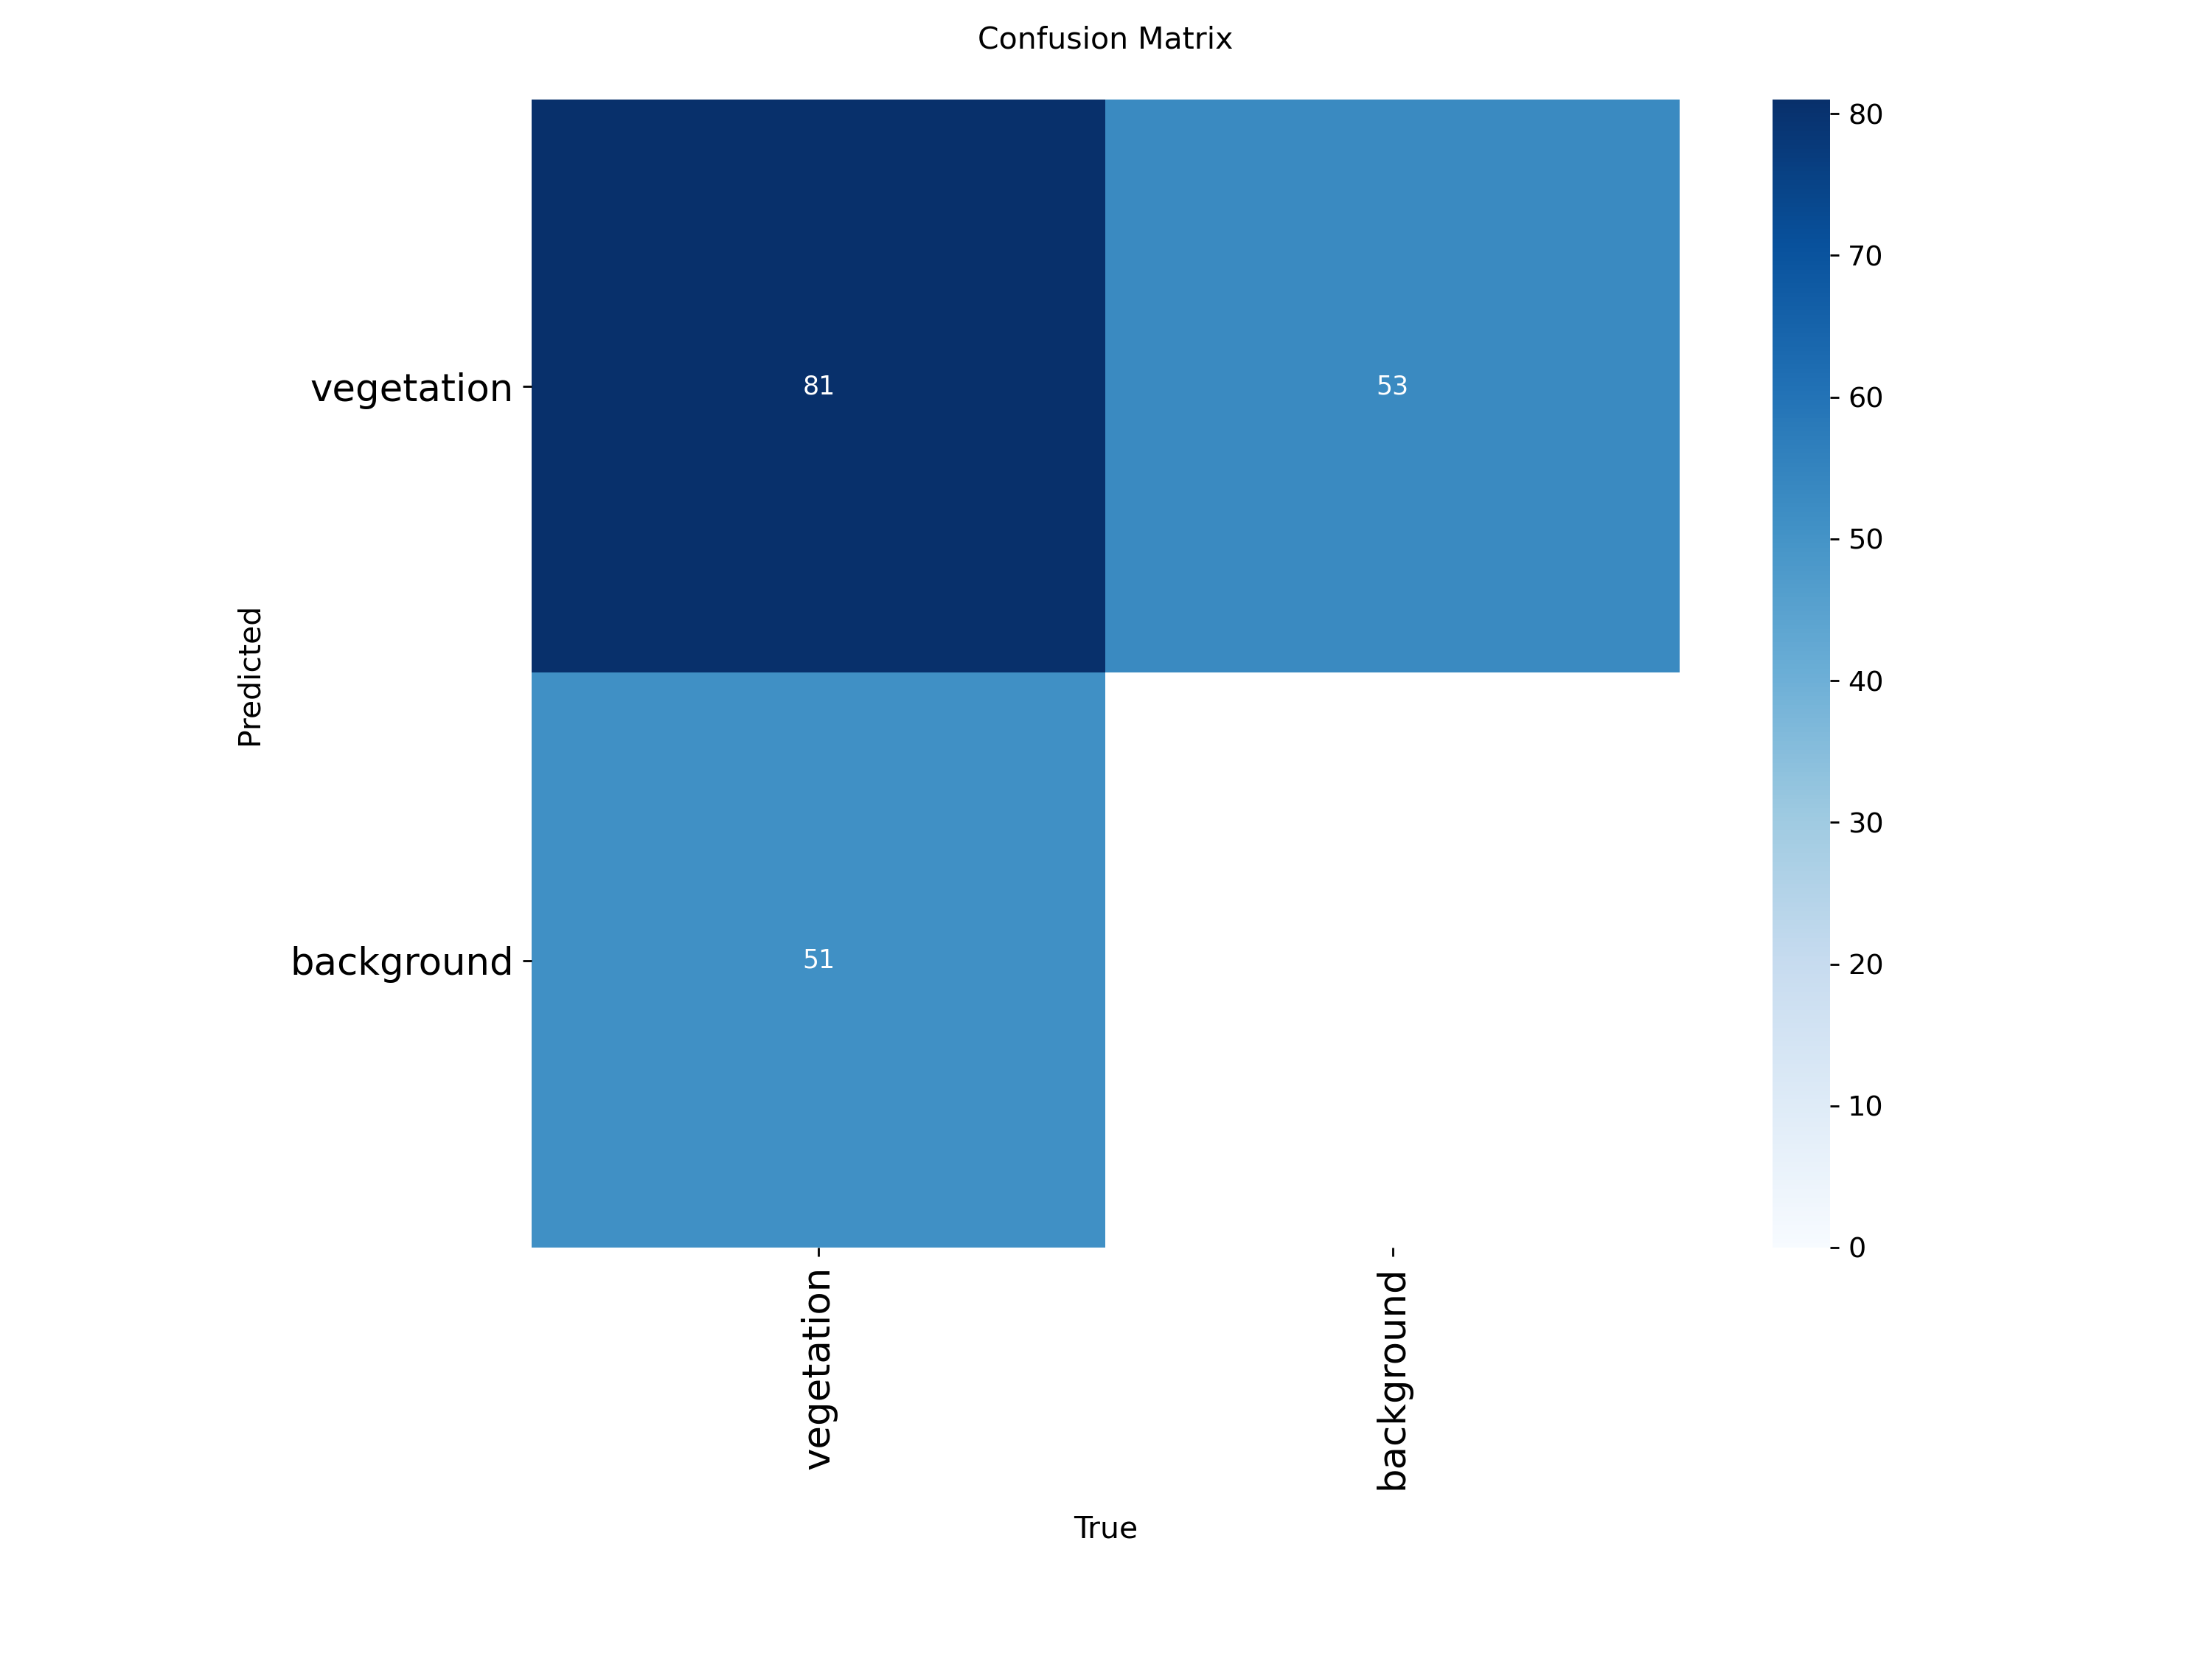

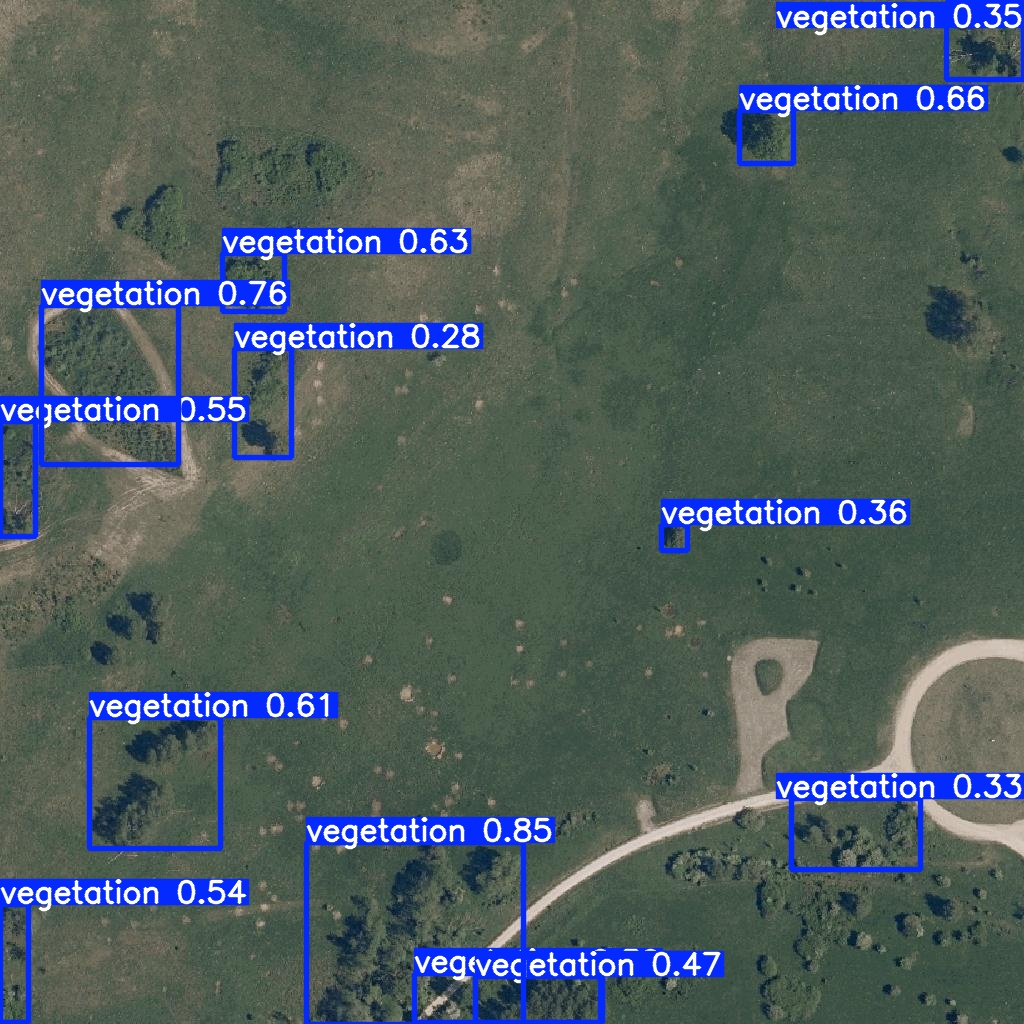

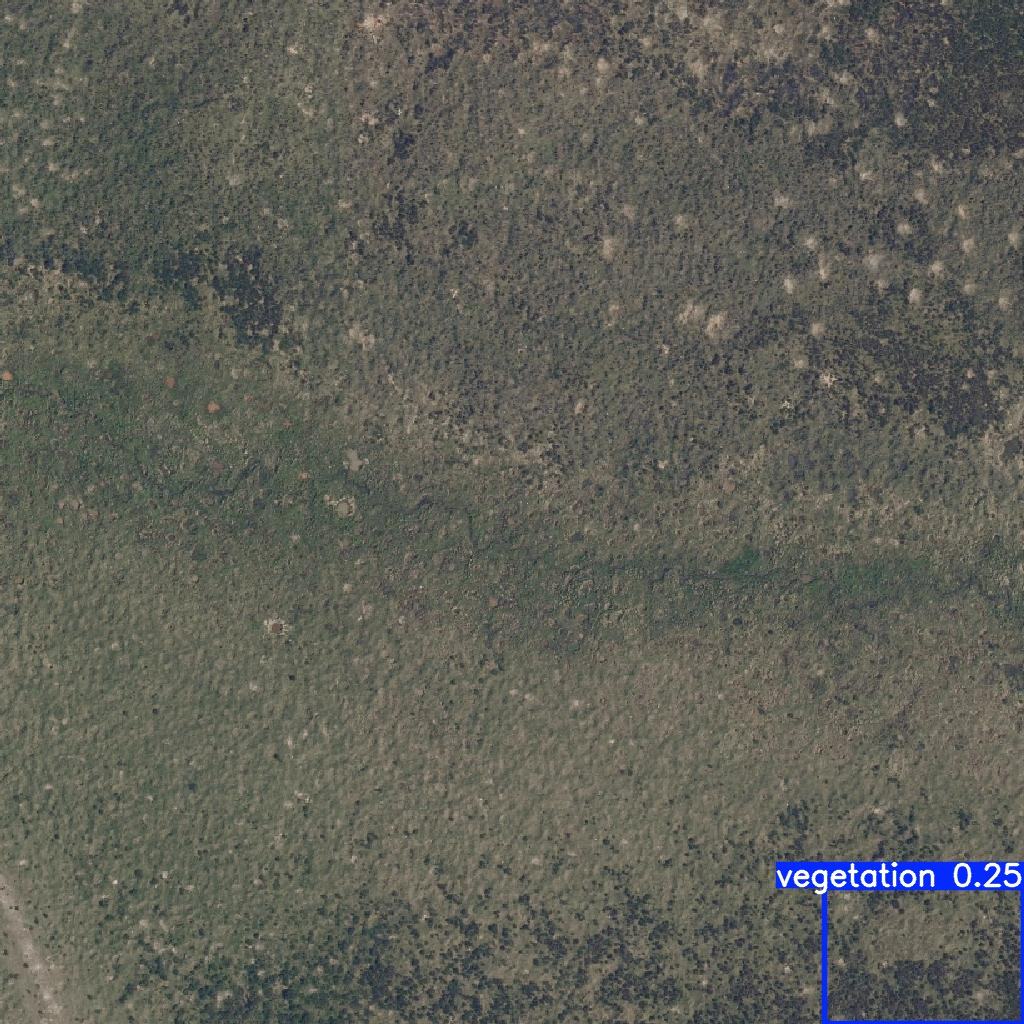

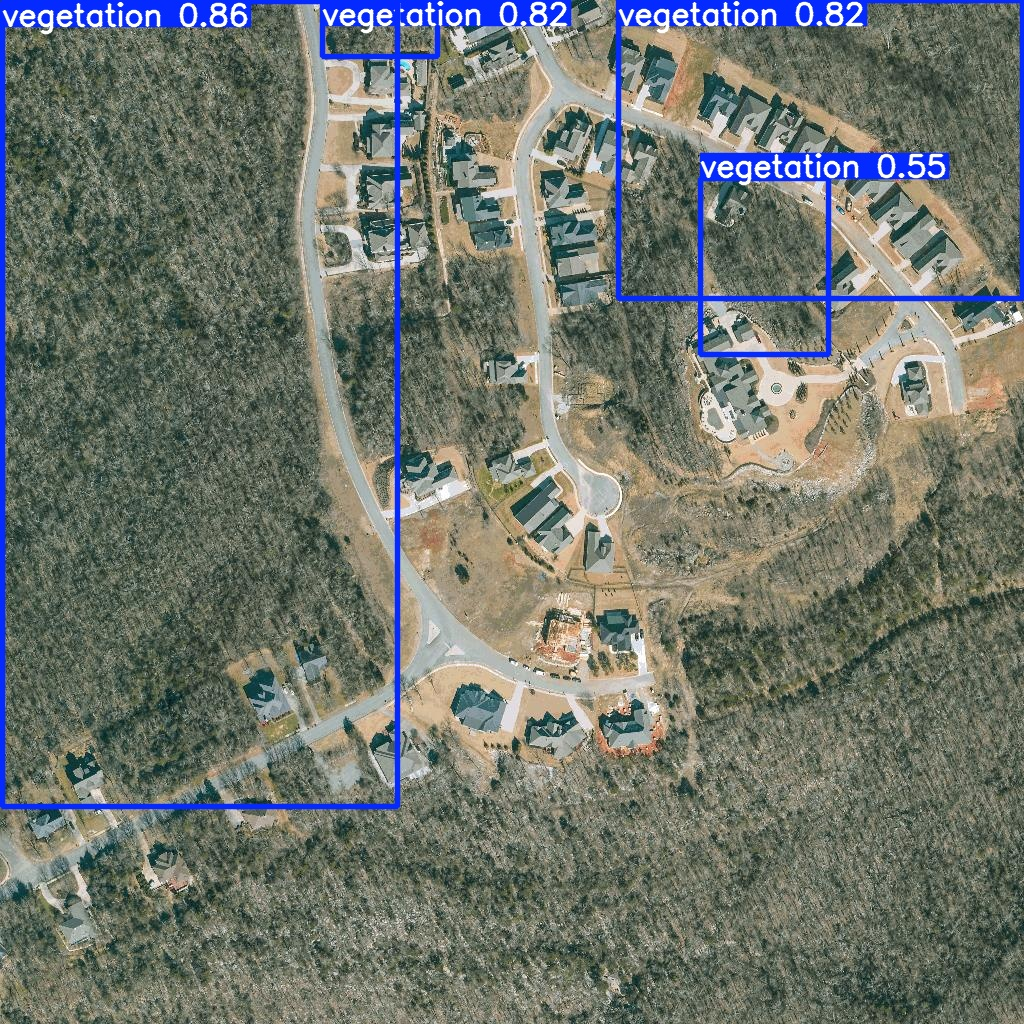

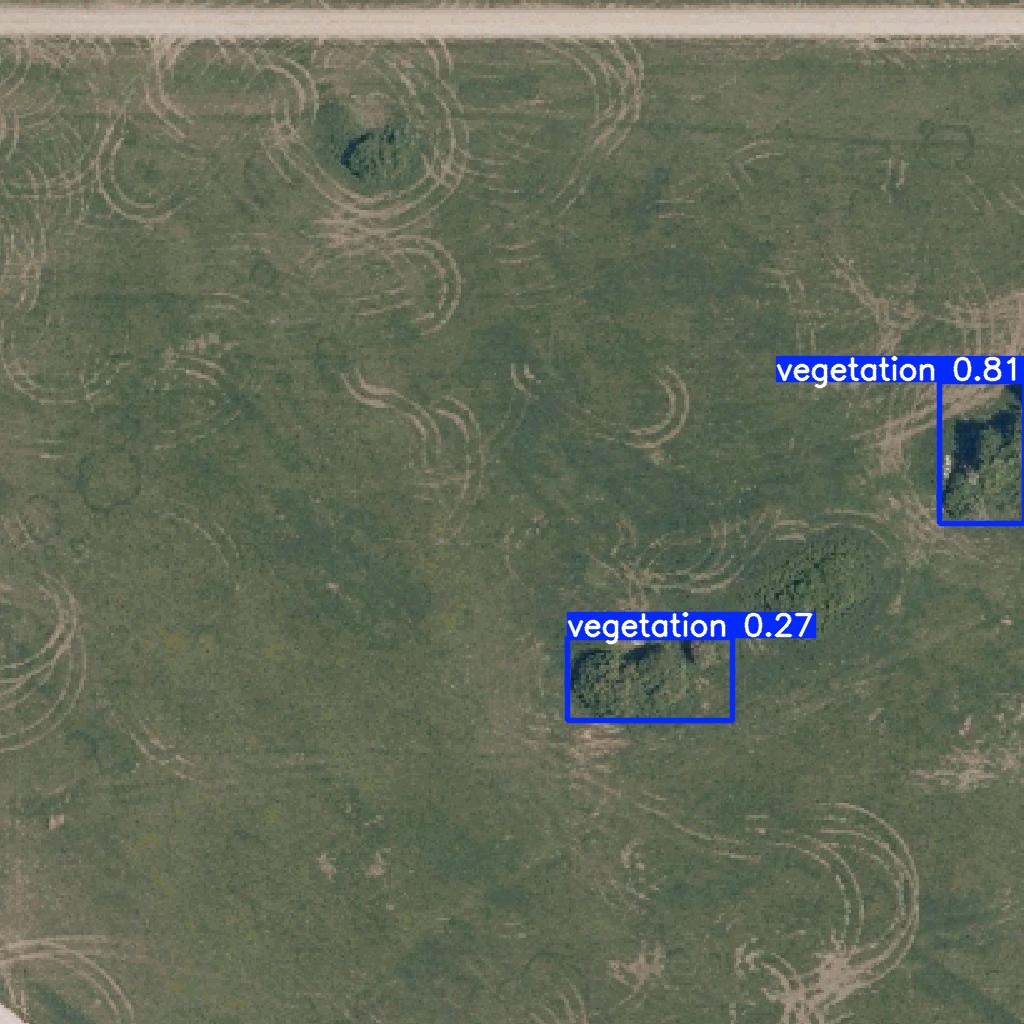

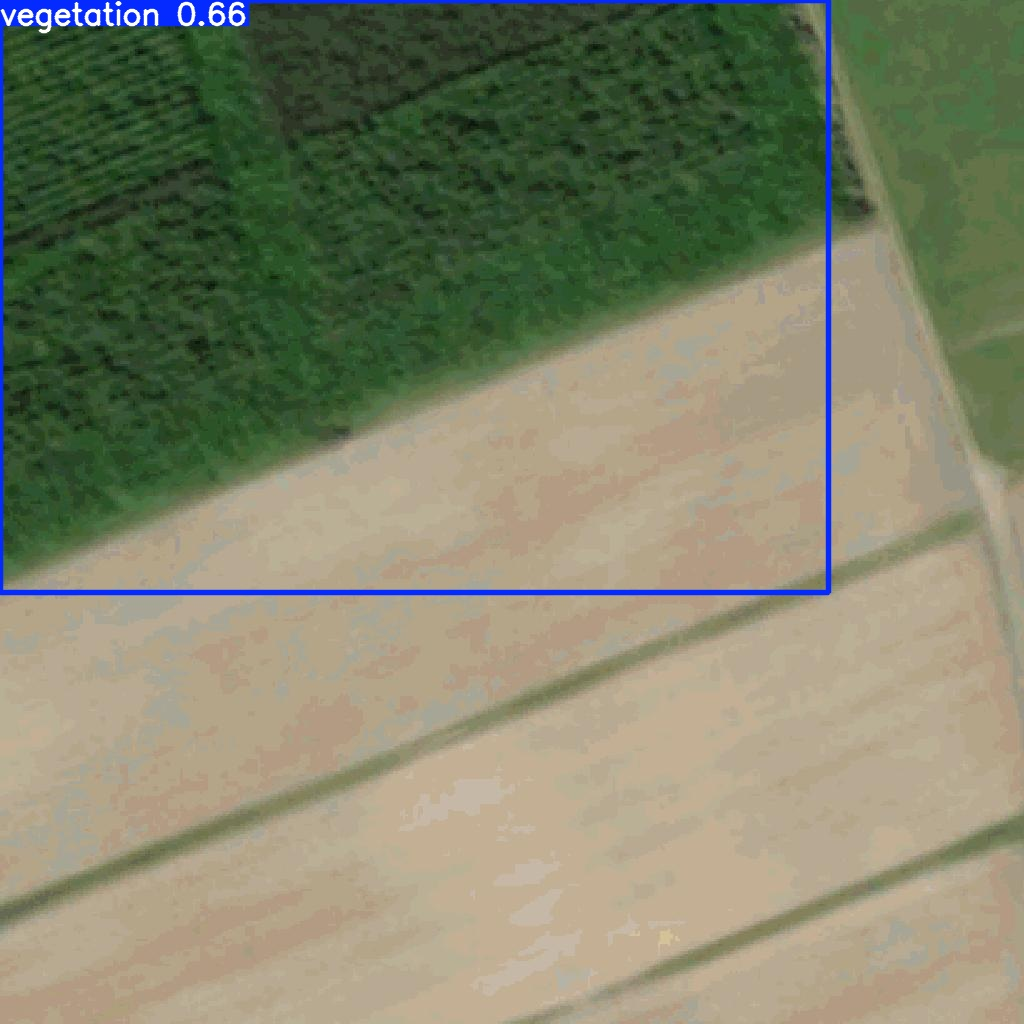

In [12]:
from IPython.display import Image, display
import glob

# Training result plots
display(Image(filename='/content/runs/detect/yolo_detection/results.png'))
display(Image(filename='/content/runs/detect/yolo_detection/confusion_matrix.png'))

# Display a few predicted images
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path, height=500))


In [13]:
import os, glob, shutil

# Create predictions folder in Drive
drive_pred_dir = "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/predictions"
os.makedirs(drive_pred_dir, exist_ok=True)

# Copy all predicted images
for f in glob.glob('/content/runs/detect/predict/*.jpg'):
    shutil.copy(f, drive_pred_dir)

print("✅ All predictions saved to:", drive_pred_dir)


✅ All predictions saved to: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/predictions


In [14]:
import shutil

drive_weights_dir = "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/trained_weights"
os.makedirs(drive_weights_dir, exist_ok=True)

shutil.copy(
    "/content/runs/detect/yolo_detection/weights/best.pt",
    os.path.join(drive_weights_dir, "best.pt")
)

print("✅ Model saved permanently to:", drive_weights_dir)


✅ Model saved permanently to: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/trained_weights
